# Building Linear Regression Model

## Learning Objectives

After learning this section, you'll know how to do the following:
- Convert from mathematical notations to Python code using NumPy library
- Build a Linear Regression model
- Evaluate a Linear Regression model

## Import Libraries

We begin with the following code to import the required libraries:

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

## Randomly Generate the Data

As usual, let's start with 2-dimensional data first. We will randomly generate the data with a dependent variable $y$ and only one independent variable $x$. The data includes 100 data points scattered about a line with a slope of 5 and an intercept of 7:

In [2]:
num_data_points = 100

# get a new instance of random numbers generator
rng = np.random.default_rng(seed=12345)

# generate x
x = rng.random(size=(num_data_points, 1))

# generate y with the defined slope and intercept
slope = 5
intercept = 7

y = (slope * x + intercept) + rng.random(size=(num_data_points, 1))

print("Shape of x:", x.shape)
print("The first 5 rows of x:", x[:5])
print()
print("Shape of y:", y.shape)
print("The first 5 rows of y:", y[:5])

Shape of x: (100, 1)
The first 5 rows of x: [[0.22733602]
 [0.31675834]
 [0.79736546]
 [0.67625467]
 [0.39110955]]

Shape of y: (100, 1)
The first 5 rows of y: [[ 8.30530896]
 [ 8.82393576]
 [11.76683514]
 [10.58504095]
 [ 9.50759871]]


Let's visualize $\pmb{x}$ and $\pmb{y}$ to see how it looks:

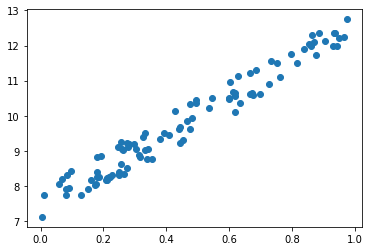

In [3]:
plt.scatter(x, y);

## Build Linear Regression Model

Let's review the Linear Regression model in matrix notation.

$$
\begin{align}
  \pmb{\hat{y}} &= \pmb{X}\pmb{w} \\
  \begin{bmatrix}
    \hat{y}^{(1)} \\
    \hat{y}^{(2)} \\
    \vdots \\
    \hat{y}^{(m)}
  \end{bmatrix} &=
    \begin{bmatrix}
      1 & x^{(1)}_1 & x^{(1)}_2 & \cdots & x^{(1)}_n \\  
      1 & x^{(2)}_1 & x^{(2)}_2 & \cdots & x^{(1)}_n \\
      \vdots \\
      1 & x^{(m)}_1 & x^{(m)}_2 & \cdots & x^{(m)}_n
    \end{bmatrix} \begin{bmatrix}
      w_0 \\
      w_1 \\
      \vdots \\
      w_n
    \end{bmatrix}
\end{align}
$$

The goal of Linear Regression is to find a best fitting line to the observed data by picking the optimal $\pmb{w}$ parameters. These parameters can be found using the normal equation as follows:


$$\pmb{w} = (\pmb{X}^\top \pmb{X})^{-1} \pmb{X}^\top \pmb{y} $$


First, we need to form the $\pmb{X}$ matrix by adding a bias $x_0 = 1$ to each row of the column vector $\pmb{x}$. This can be done using the following function.

In [4]:
def add_bias(x):
    return np.hstack([np.ones((x.shape[0], 1)), x])


X = add_bias(x)
print("The first 5 rows of X:", X[:5])

The first 5 rows of X: [[1.         0.22733602]
 [1.         0.31675834]
 [1.         0.79736546]
 [1.         0.67625467]
 [1.         0.39110955]]


Then, we find the optimal model parameters $\pmb{w}$ using the normal equation. This can be implement using NumPy as follows:

In [5]:
w = np.linalg.pinv(X.T.dot(X)).dot(X.T).dot(y)
print("w = ", w)

w =  [[7.40740442]
 [5.21243721]]


Finally, we can estimate $\hat{y}$ using the computed $\pmb{w}$ values.

In [6]:
y_hat = X.dot(w)
print("The first 5 rows of y_hat:", y_hat[:5])

The first 5 rows of y_hat: [[ 8.59237916]
 [ 9.05848737]
 [11.5636218 ]
 [10.93233943]
 [ 9.44603839]]


Let's visualize the observed data point, best fitting line and its residual errors.

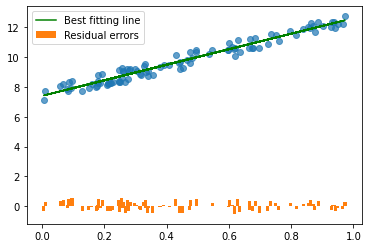

In [7]:
plt.scatter(x, y, alpha=0.7)
plt.plot(x, y_hat, color="green", label="Best fitting line")

residuals = y - y_hat
plt.bar(x[:, 0], residuals[:, 0], width=0.01, label="Residual errors")

plt.legend();

## Evaluate Linear Regression Model

Now, it's time to evaluate our Linear Regression model performance. For regression problems, three common evaluation metrics are used.

1. **Mean Absolute Error** (MAE) is the mean of the absolute value of the residual errors.

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

2. **Mean Squared Error** (MSE) is the mean of the squared residual errors.

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

3. **Root Mean Squared Error** (RMSE) is the square root of the mean of the squared residual errors.

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

The lower the residuals, the lower values of MAE, MSE, and RMSE. Hence, lower values of these metrics indicate better fit of data.

These evaluation metrics can be implement as follows:

In [8]:
def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))


def mean_squared_error(y_true, y_pred):
    return np.mean(np.square(y_true - y_pred))


def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(np.mean(np.square(y_true - y_pred)))

Let's define a function `evaluate` to evaluate our model performance using the above metrics.

In [9]:
def evaluate(y, y_hat):
    mae = mean_absolute_error(y, y_hat)
    mse = mean_squared_error(y, y_hat)
    rmse = root_mean_squared_error(y, y_hat)

    print("MAE:", mae)
    print("MSE:", mse)
    print("RMSE:", rmse)


evaluate(y, y_hat)

MAE: 0.25538144017166864
MSE: 0.08714506146929557
RMSE: 0.2952034238780024


## Linear Regression Class

It will be better if we gather the above code and functions into a `LinearRegression` class, so we can reuse it later. Its implementation is as follows:

In [10]:
def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))


def mean_squared_error(y_true, y_pred):
    return np.mean(np.square(y_true - y_pred))


def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(np.mean(np.square(y_true - y_pred)))


class LinearRegression:
    def __init__(self):
        self.w = None

    def fit(self, x, y):
        X = self._add_bias(x)
        self.w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

    def predict(self, x):
        X = self._add_bias(x)
        return X.dot(self.w)

    def evaluate(self, x, y):
        y_pred = self.predict(x)

        mae = mean_absolute_error(y, y_pred)
        mse = mean_squared_error(y, y_pred)
        rmse = root_mean_squared_error(y, y_pred)

        print("MAE:", mae)
        print("MSE:", mse)
        print("RMSE:", rmse)

    def _add_bias(self, x):
        return np.hstack([np.ones((x.shape[0], 1)), x])

Let's use the new `LinearRegression` class to fit the generated data again. 

In [11]:
model = LinearRegression()
model.fit(x, y)

print("Model parameters:", model.w)
print("Evaluation results:")
model.evaluate(x, y)

Model parameters: [[7.40740442]
 [5.21243721]]
Evaluation results:
MAE: 0.25538144017166836
MSE: 0.08714506146929551
RMSE: 0.2952034238780023


That's it! That's how you can implement Linear Regression model in Python using NumPy library. Now you have a `LinearRegression` class with a nice and easy-to-use API that can be applied in your own projects. Let's move to the next section where we use these implementation on real-world data. It's gonna be fun!

## Challenges

Why don't you challenge yourself a little bit? Here are some ideas:

- Generate 3-dimensional data with a dependent variable $y$ and two independent variable $x_1$, and $x_2$
- Use the `LinearRegression` class to create a model and fit it with the generated 3D data
- Visualize the fitting plane
- Why not add more independent variables, for example 1000 variables? Let's try to fit the model with a high-dimensional data and observe any changes in running time, evaluation results, etc.